# Funciones extra

In [2]:
# Plot polynomials

def plotPoly(polys, name, L, R, col = None, f = None):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        if f == None: a += plot(polys[i], x, L[i], R[i], color=col if col != None else classic_colors[i])
        else: a += plot(polys[i], x, L[i], R[i], color=col if col != None else classic_colors[i], fill = lambda x : f(x), fillcolor = 'gray')
    show(a)

In [3]:
def Lagrange(points):
    #x = R.0
    var('x')
    n = len(points)
    assert(n > 1)
    ans = 0
    for i in range(n):
        act = points[i][1]
        for j in range(n):
            if i == j: continue
            act *= (x - points[j][0]) / (points[i][0] - points[j][0])
        ans += act
    return ans

In [4]:
def plotDerivative(points, method, name, color = None, f = None):
    n = len(points)
    assert(n > 1)
    pointsdx = points
    polys = []
    L = []
    R = []
    for i in range(n-1):
        P = Lagrange([pointsdx[i], pointsdx[i+1]])
        polys.append(P)
        L.append(pointsdx[i][0])
        R.append(pointsdx[i+1][0])
    plotPoly(polys, name, L, R, color, f)

In [5]:
def getPlot(polys, name, L, R, col = None, f = None):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        if f == None: a += plot(polys[i], x, L[i], R[i], color=col if col != None else classic_colors[i])
        else: a += plot(polys[i], x, L[i], R[i], color=col if col != None else classic_colors[i], fill = lambda x : f(x), fillcolor = 'gray')
    return a

In [6]:
def getDerivativePlot(points, method, name, color = None, f = None):
    n = len(points)
    assert(n > 1)
    pointsdx = points
    polys = []
    L = []
    R = []
    for i in range(n-1):
        P = Lagrange([pointsdx[i], pointsdx[i+1]])
        polys.append(P)
        L.append(pointsdx[i][0])
        R.append(pointsdx[i+1][0])
    return getPlot(polys, name, L, R, color, f)

# Problema 4

Los datos del problema 5 se tomaron de las siguientes funciones. Calcule los errores reales del problema 5 y  obtenga las cotas por medio de las fórmulas de error.

a) $f(x) = \sin^{2}{x}$

b) $f(x) = \mathrm{e}^{\frac{x}{2}} + x$

In [9]:
def d3f(x0, h, f): # Aproximación de la 3ra derivada
    den = 1 / 2 / h ** 3
    num = f(x0 + 2 * h) - 2 * f(x0 + h) + 2 * f(x0 - h) - f(x0 - 2 * h)
    return num * den

Funcion original:
sin(x)^2
Tercera derivada:
-8*cos(x)*sin(x)


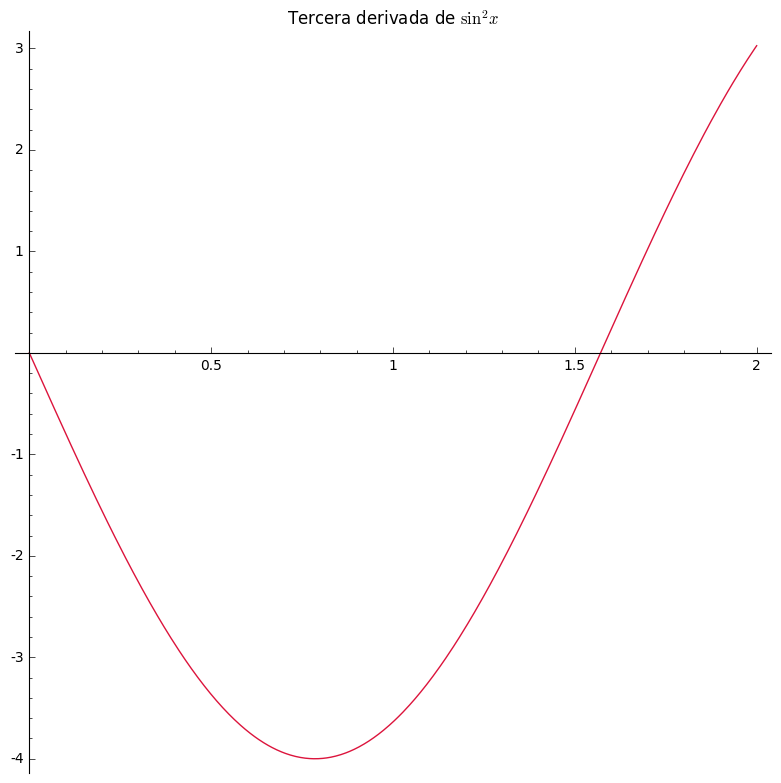

/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:21: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:22: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:28: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/pyth

Error 1 = 0.2476410183
Error 2 = 0.0024862337


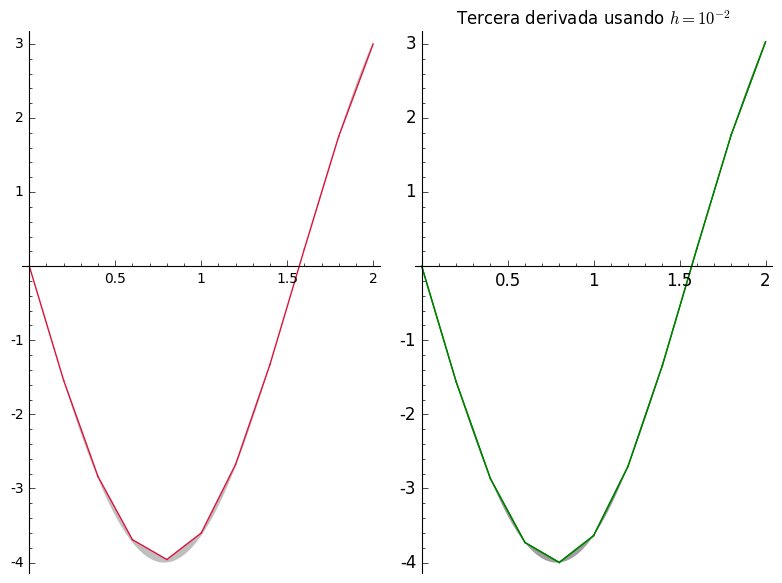

Error 3 = 0.0000252277
Error 4 = 0.0009002686


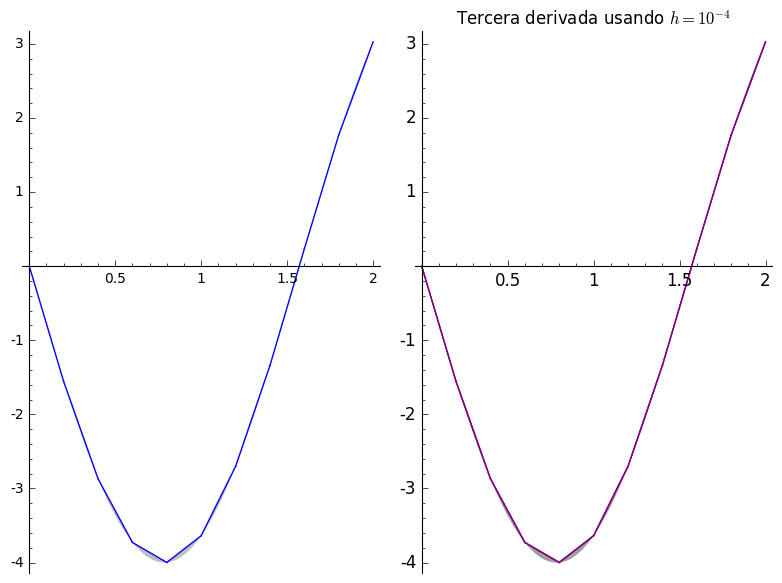

Error 1 = 0.2476410183
Error 2 = 0.0024862337
Error 3 = 0.0000252277
Error 4 = 0.0009002686
Error 5 = 0.2578125000
Error 6 = 816.0000000000
Error 7 = 606208.0000000000
Error 8 = 687865856.0000000000
Error 9 = 579820584960.0000000000
Error 10 = 668503069687808.0000000000


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:40: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [11]:
var('x')
f1 = sin(x) ** 2
d1f1 = derivative(f1)
d2f1 = derivative(d1f1)
d3f1 = derivative(d2f1)

print("Funcion original:")
print(f1)
print("Tercera derivada:")
print(d3f1)

plotPoly([d3f1], "Tercera derivada de $\sin^{2}{x}$", [0], [2])

n = 10

colors = ['crimson', 'green', 'blue', 'purple', 'brown', 'orange', 'yellow']

for i in range(1, 5, 2):
    h1 = 1 / 10 ** i
    h2 = h1 / 10
    points1 = [(p * 2 / n, d3f(p * 2 / n, h1, f1)) for p in range(n + 1)]
    points2 = [(p * 2 / n, d3f(p * 2 / n, h2, f1)) for p in range(n + 1)]
    name1 = 'Tercera derivada usando $h = 10^{-' + '{}'.format(i) + '}$'
    name2 = 'Tercera derivada usando $h = 10^{-' + '{}'.format(i+1) + '}$'
    error1 = 0
    error2 = 0
    for p in range(n + 1):
        error1 += abs(d3f(p * 2 / n, h1, f1) - d3f1(p * 2 / n))
        error2 += abs(d3f(p * 2 / n, h2, f1) - d3f1(p * 2 / n))
    print('Error %d = %.10f' % (i, error1))
    print('Error %d = %.10f' % (i + 1, error2))
    plot1 = getDerivativePlot(points1, Lagrange, name1, colors[i-1], d3f1)
    plot2 = getDerivativePlot(points2, Lagrange, name2, colors[i], d3f1)
    show(graphics_array((plot1,plot2)))

for i in range(1, 11):
    h1 = 1 / 10 ** i
    error1 = 0
    for p in range(n + 1):
        error1 += abs(d3f(p * 2 / n, h1, f1) - d3f1(p * 2 / n))
    print('Error %d = %.10f' % (i, error1))

Funcion original:
x + e^(1/2*x)
Tercera derivada:
1/8*e^(1/2*x)


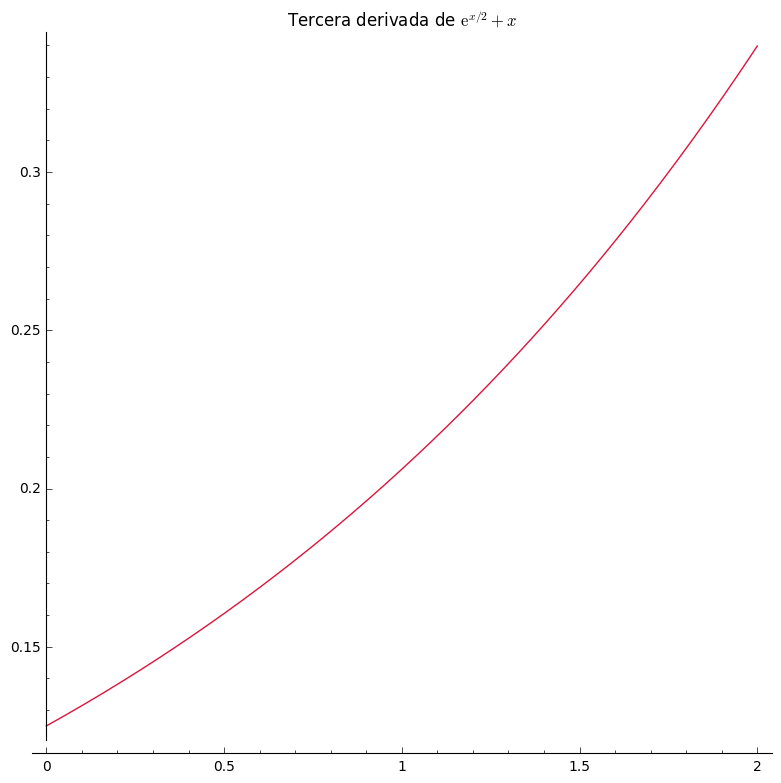

/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:21: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:22: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:28: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/pyth

Error 1 = 0.0014891438
Error 2 = 0.0000148878


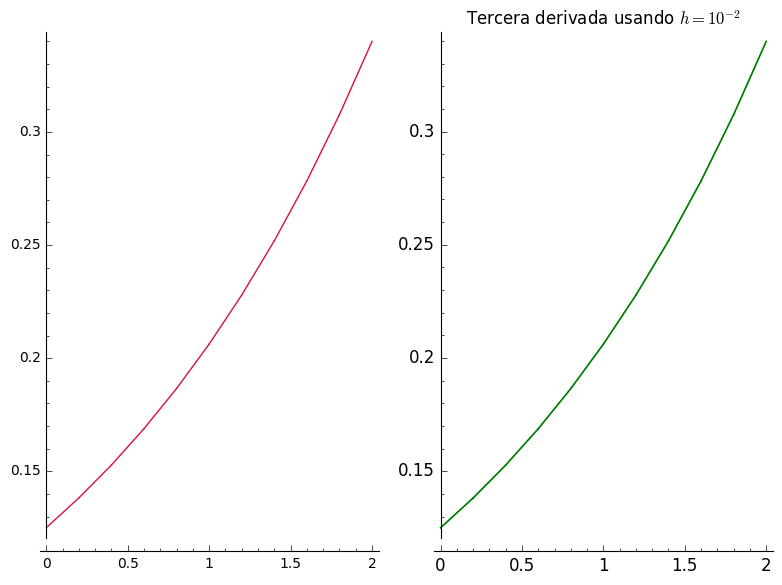

Error 3 = 0.0000022584
Error 4 = 0.0015638640


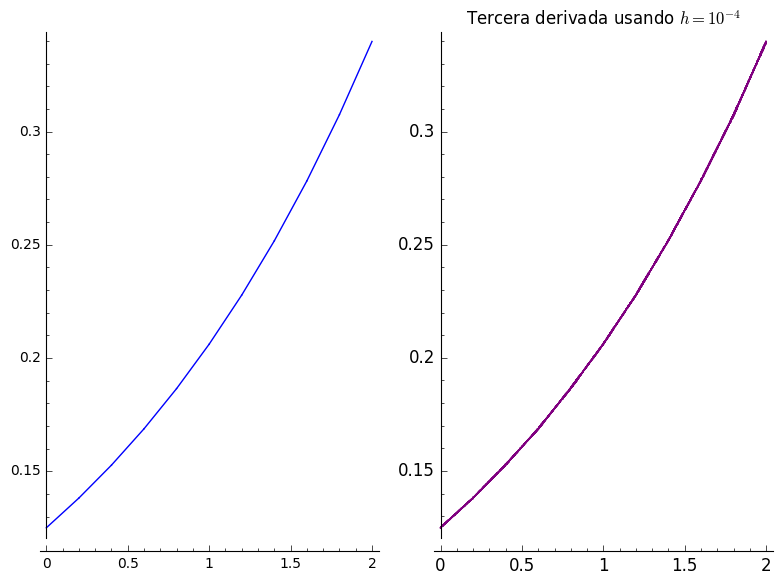

Error 1 = 0.0014891438
Error 2 = 0.0000148878
Error 3 = 0.0000022584
Error 4 = 0.0015638640
Error 5 = 1.9375000000
Error 6 = 1407.7939098412
Error 7 = 1048576.7657393496
Error 8 = 1811939328.2060902119
Error 9 = 687194767360.5458984375
Error 10 = 1829587348619264.0000000000


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:40: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [13]:
var('x')
f2 = exp(x / 2) + x
d1f2 = derivative(f2)
d2f2 = derivative(d1f2)
d3f2 = derivative(d2f2)

print("Funcion original:")
print(f2)
print("Tercera derivada:")
print(d3f2)

plotPoly([d3f2], "Tercera derivada de $\mathrm{e}^{x / 2} + x$", [0], [2])

n = 10

colors = ['crimson', 'green', 'blue', 'purple', 'brown', 'orange', 'yellow']

for i in range(1, 5, 2):
    h1 = 1 / 10 ** i
    h2 = h1 / 10
    points1 = [(p * 2 / n, d3f(p * 2 / n, h1, f2)) for p in range(n + 1)]
    points2 = [(p * 2 / n, d3f(p * 2 / n, h2, f2)) for p in range(n + 1)]
    name1 = 'Tercera derivada usando $h = 10^{-' + '{}'.format(i) + '}$'
    name2 = 'Tercera derivada usando $h = 10^{-' + '{}'.format(i+1) + '}$'
    error1 = 0
    error2 = 0
    for p in range(n + 1):
        error1 += abs(d3f(p * 2 / n, h1, f2) - d3f2(p * 2 / n))
        error2 += abs(d3f(p * 2 / n, h2, f2) - d3f2(p * 2 / n))
    print('Error %d = %.10f' % (i, error1))
    print('Error %d = %.10f' % (i + 1, error2))
    plot1 = getDerivativePlot(points1, Lagrange, name1, colors[i-1], d3f2)
    plot2 = getDerivativePlot(points2, Lagrange, name2, colors[i], d3f2)
    show(graphics_array((plot1,plot2)))

for i in range(1, 11):
    h1 = 1 / 10 ** i
    error1 = 0
    for p in range(n + 1):
        error1 += abs(d3f(p * 2 / n, h1, f2) - d3f2(p * 2 / n))
    print('Error %d = %.10f' % (i, error1))

# Problema 7

Estime el valor óptimo de h para las fórmulas de tres puntos.

In [ ]:
# No entendí lo que se pedía, RIP :'v

# Problema 10

Dada la función $f(x) = x^{5} - 3x^{4} - 5x - 1$ se desea calcular su integral en el intervalo $[0, 3]$ empleando los siguientes métodos:

a) Integral exacta

b) Mediante la fórmula de Newton-Cotes de 3 puntos. Mejora si empleas 4 puntos.

c) Mediante la fórmula de Newton-Cotes de 5 puntos.

In [51]:
def NewtonCotes(f, a, b, n, abierta = False):
    h = (b - a) / (n + 2)
    x = [i * h + a for i in range(n + 3)]
    if abierta:
        assert(n < 6)
        if n == 0:
            coef = [0, 2 * h, 0]
        elif n == 1:
            coef = [0, 3 * h / 2, 3 * h / 2, 0]
        elif n == 2:
            coef = [0, 8 * h / 3, - 4 * h / 3, 8 * h / 3, 0]
        elif n == 3:
            coef = [0, 55 * h / 24, 5 * h / 24, 5 * h / 24, 55 * h / 24, 0]
        elif n == 4:
            coef = [0, 66 * h / 20, - 84 * h / 20, 156 * h / 20, - 84 * h / 20, 66 * h / 20, 0]
        else:
            coef = [0, 4277 * h / 1440, - 3171 * h / 1440, 3934 * h / 1440, 3934 * h / 1440, - 3171 * h / 1440, 4277 * h / 1440, 0]
    else:
        assert(n < 11) # WIP
        
    I = 0
    for i in range(n + 3):
        I += f(x[i]) * coef[i]
    return I

In [73]:
f3 = x ** 5 - 3 * x ** 4 - 5 * x - 1

i3 = integrate(f3)

print("Funcion:")
print(f3)

print("Integral con C = 0")
print(i3)
print("")
Exacta = (i3(x = 3) - i3(x = 0))
print("Integral exacta:")
print(Exacta.n(digits = 30))
print("Newton-Cotes con n = 3")
NC3 = NewtonCotes(f3, 0, 3, 3, True)
print(NC3.n(digits = 30))
print("Newton-Cotes con n = 4")
NC4 = NewtonCotes(f3, 0, 3, 4, True)
print(NC4.n(digits = 30))
print("Newton-Cotes con n = 5")
NC5 = NewtonCotes(f3, 0, 3, 5, True)
print(NC5.n(digits = 30))

Funcion:
x^5 - 3*x^4 - 5*x - 1
Integral con C = 0
1/6*x^6 - 3/5*x^5 - 5/2*x^2 - x

Integral exacta:
-49.8000000000000000000000000000
Newton-Cotes con n = 3
-55.3404000000000000000000000000
Newton-Cotes con n = 4
-49.8000000000000000000000000000
Newton-Cotes con n = 5
-49.8000000000000000000000000000


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:15: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:18: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:21: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


# Problema 13

Sea $\int\limits_{0}^{\pi}\sin{x}dx = 2$, usando la regla de Trapecio Compuesta.

a) Aproxime con $n = 4$ y estime el error.

b) Estime $n$ para obtener un error de $E \leq 0.5 \cdot 10^{-8}$.

In [55]:
def TrapecioCompuesta(f, a, b, n):
    h = (b - a) / n
    I = 0
    for i in range(n + 1):
        cur_x = a + i * h
        I += f(cur_x)
    I *= 2
    I += f(a) + f(b)
    I *= h / 2
    return I

In [81]:
f4 = sin(x)

i4 = integrate(f4)

PI = acos(-1)

print("Funcion:")
print(f4)

print("Integral con C = 0")
print(i4)
print("")
Exacta = (i4(PI) - i4(0))
print("Integral exacta:")
print(Exacta.n(digits = 30))
print("Trapecio Compuesta con n = 4")
print(TrapecioCompuesta(f4, 0, PI, 4).n(digits = 30))
print("Error = %.9f" % (Exacta - TrapecioCompuesta(f4, 0, PI, 4)))
print("Error teórico (cota superior) = %.9f" % ((PI - 0) ** 3 / 12 / 16))

Funcion:
sin(x)
Integral con C = 0
-cos(x)

Integral exacta:
2.00000000000000000000000000000
Trapecio Compuesta con n = 4
1.89611889793703987136963109334
Error = 0.103881102
Error teórico (cota superior) = 0.161491024


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:17: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:18: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


El error estimado de la regla del trapecio compuesta está dado por:

$$ \left|-\frac{(b - a)^{3}}{12n^{2}}f''(\xi)\right| \approx \left|Error\right| \leq \left|\frac{(b - a)^{3}}{12n^{2}}\sup_{\xi \in [0, \pi]}f''(\xi)\right| $$

Analizamos la segunda derivada de $\sin{x}$:

$$ f''(x) = -\sin{x} $$

Notamos que en el intervalo $[0, \pi]$ toma su máximo valor absoluto en $\xi = \frac{\pi}{2}$, así que:

$$ |\sup_{\xi \in [0, \pi]}f''(\xi)| = 1 $$

Por lo tanto:

$$ \left|Error\right| \leq \left|\frac{(b - a)^{3}}{12n^{2}}\right| = \frac{(b - a)^{3}}{12n^{2}} \leq 0.5 \cdot 10^{-8} $$

$$ \frac{(b - a)^{3}}{12n^{2}} \leq 0.5 \cdot 10^{-8} $$

$$ \frac{\pi^{3}}{12\cdot 0.5 \cdot 10^{-8}} \leq n^{2} $$

$$ \sqrt{\frac{\pi^{3}}{12\cdot 0.5 \cdot 10^{-8}}} \leq n $$

$$ \frac{\pi}{10^{-4}} \sqrt{\frac{\pi}{6}} \leq n $$

$$ 10^{4} \cdot \pi \sqrt{\frac{\pi}{6}} \leq n $$

$$ 22732.6038544861156634390568807 \leq n $$

$$ 22733 \leq n $$

El mínimo n para garantizar un error menor o igual a $0.5\cdot10^{-8}$ sería 22733.

In [78]:
print("Integral exacta:")
print(Exacta.n(digits = 30))
print("Trapecio Compuesta con n = 22733")
print(TrapecioCompuesta(f4, 0, PI, 22733).n(digits = 30))
print("Error = %.15f" % (Exacta - TrapecioCompuesta(f4, 0, PI, 22733)))

Integral exacta:
2.00000000000000000000000000000
Trapecio Compuesta con n = 22733
1.99999999681701207361554476028
Error = 0.000000003182986


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:5: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
